# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [138]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [142]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | roswell
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | bhuj
Processing Record 6 of Set 1 | guachochi
City not found. Skipping...
Processing Record 7 of Set 1 | santa cruz
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | mariehamn
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | mil'kovo
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | mansa
Processing Record 15 of Set 1 | sarmiento
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | katabu
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | bay city
Processing Record 21 of Set 1 | clairton
Processing Record 22 of Set 1

In [146]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [148]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,roswell,34.0232,-84.3616,23.86,60,100,3.09,US,1713995255
1,edinburgh of the seven seas,-37.0676,-12.3116,16.10,73,100,6.27,SH,1713995255
2,bethel,41.3712,-73.4140,18.18,45,20,4.63,US,1713995256
3,papatowai,-46.5619,169.4708,15.35,60,22,4.50,NZ,1713995256
4,bhuj,23.2667,69.6667,24.22,76,0,4.88,IN,1713995248


In [150]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [152]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,roswell,34.0232,-84.3616,23.86,60,100,3.09,US,1713995255
1,edinburgh of the seven seas,-37.0676,-12.3116,16.10,73,100,6.27,SH,1713995255
2,bethel,41.3712,-73.4140,18.18,45,20,4.63,US,1713995256
3,papatowai,-46.5619,169.4708,15.35,60,22,4.50,NZ,1713995256
4,bhuj,23.2667,69.6667,24.22,76,0,4.88,IN,1713995248


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

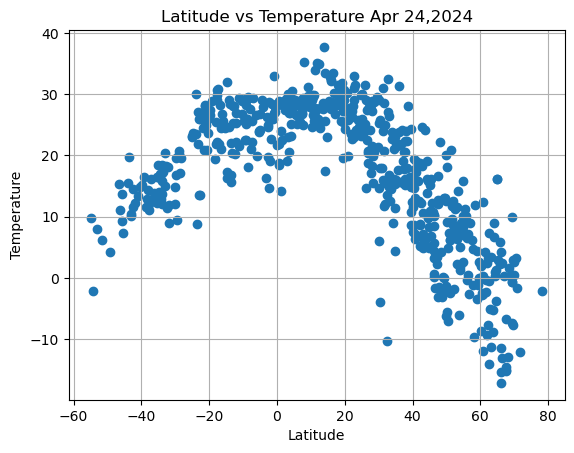

In [155]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature Apr 24,2024")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

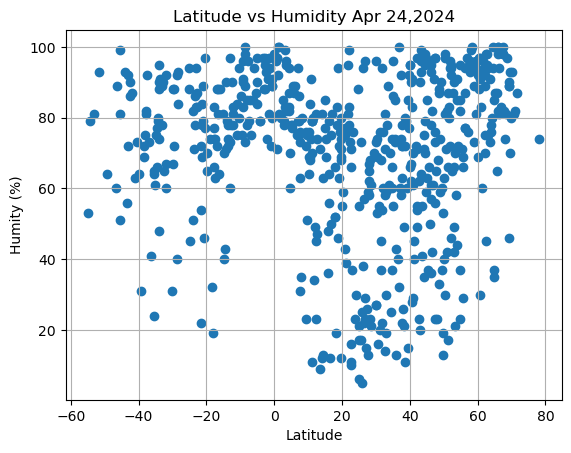

In [158]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity Apr 24,2024")
plt.ylabel("Humity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

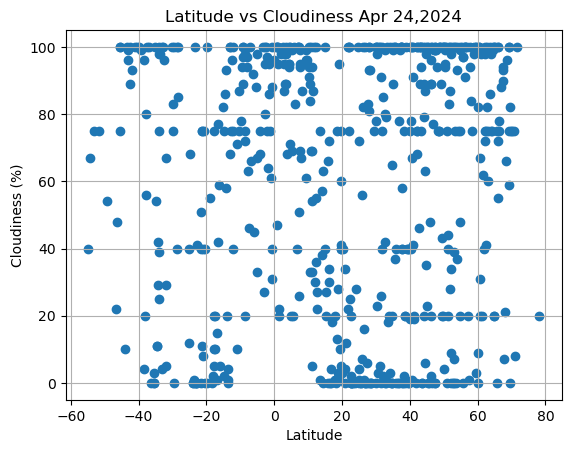

In [161]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness Apr 24,2024")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

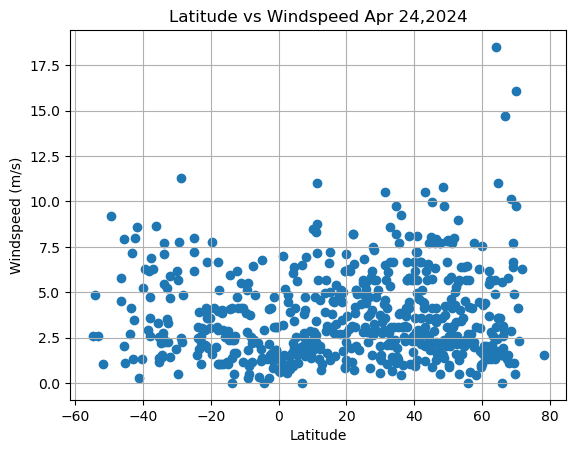

In [164]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Windspeed Apr 24,2024")
plt.ylabel("Windspeed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [167]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df["Lat"], city_data_df["Wind Speed"])

In [169]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,roswell,34.0232,-84.3616,23.86,60,100,3.09,US,1713995255
2,bethel,41.3712,-73.4140,18.18,45,20,4.63,US,1713995256
4,bhuj,23.2667,69.6667,24.22,76,0,4.88,IN,1713995248
6,longyearbyen,78.2186,15.6401,-2.09,74,20,1.54,SJ,1713995256
8,mariehamn,60.0973,19.9348,2.12,93,0,1.03,AX,1713995258


In [171]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,16.10,73,100,6.27,SH,1713995255
3,papatowai,-46.5619,169.4708,15.35,60,22,4.50,NZ,1713995256
5,santa cruz,-17.8000,-63.1667,30.70,66,75,6.69,BO,1713995256
7,port elizabeth,-33.9180,25.5701,18.39,88,75,7.72,ZA,1713995140
9,grytviken,-54.2811,-36.5092,-2.17,79,67,4.82,GS,1713995258


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: 0.7050278793617671


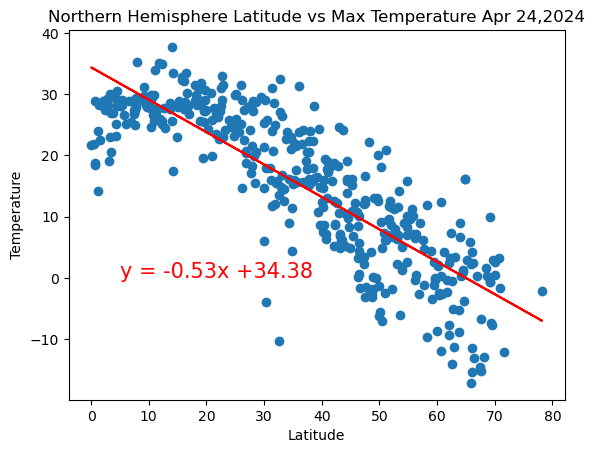

In [176]:
# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere Latitude vs Max Temperature Apr 24,2024")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(False)

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plot regression line
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5,0),fontsize=15,color="red")

#print variance
print(f"the r-value is: {rvalue**2}")

# Show plot
plt.show()

the r-value is: 0.5859988437561383


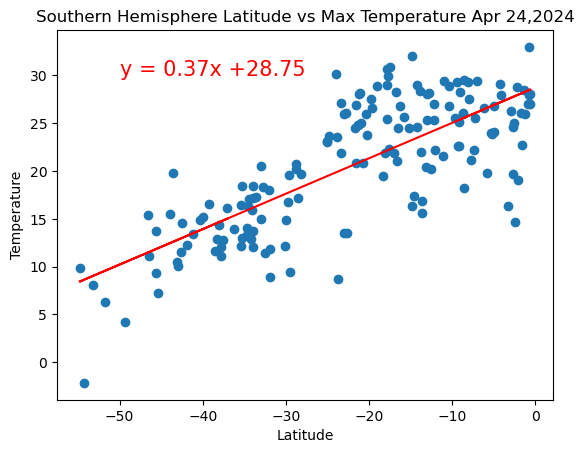

In [180]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere Latitude vs Max Temperature Apr 24,2024")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(False)

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plot regression line
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

#print variance
print(f"the r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
The relation seems to indicate that as the latitude gets further away from the equator (when the latitude is equal to 0) that the maximum temperature decreases by a rate if around 0.53 degrees celcius for each degree change in latitude in the Northern Hemisphere and by 0.37 degrees celcius for each degree change in latitude in the Southern Hemisphere Hemisphere. 

The variance in the southern hemisphere leaves some reluctance in accepting the regression as being accurate to making temperature predictions based soley on the latitude of a city. Perhaps that is due to a smaller sample sized pulled. There are generally fewer cities to collect data from in the Southern hemisphere than in the Northern Hemisphere. Either that, or maybe this data is better respresented by using a different fucntion, such as an exponential relation

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 0.0267646717630441


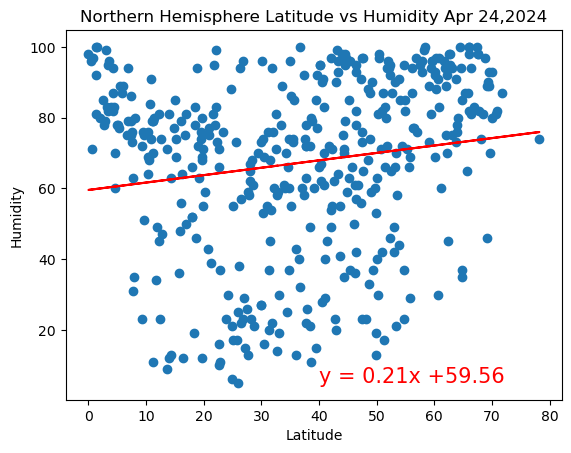

In [186]:
# Northern Hemisphere
# Build scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere Latitude vs Humidity Apr 24,2024")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(False)

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plot regression line
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")

#print variance
print(f"the r-value is: {rvalue**2}")

# Show plot
plt.show()

the r-value is: 0.06847016631307894


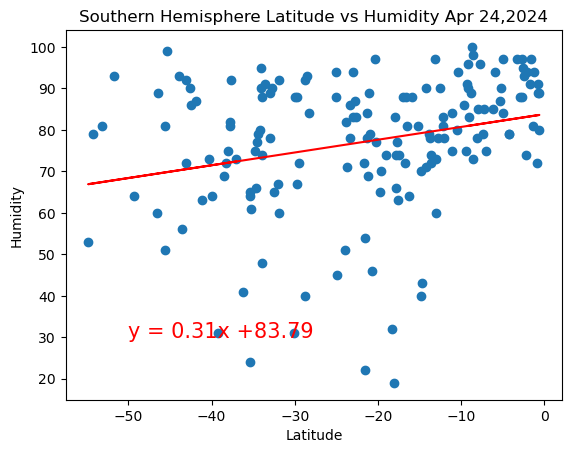

In [188]:
# Southern Hemisphere
# Build scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere Latitude vs Humidity Apr 24,2024")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(False)

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plot regression line
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

#print variance
print(f"the r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The very low variance and narly 0 slope of each regression line seems to indicate that there is a very minimal correlation between a city's latitude and its humidity. That is, the latutude of a city has little to no direct effect on that city's humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.0069883560942841875


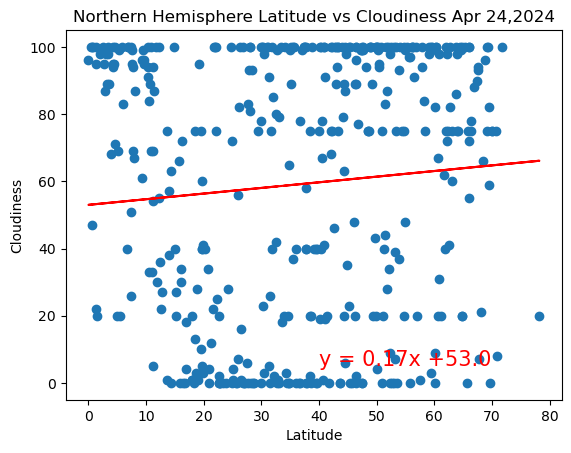

In [191]:
# Northern Hemisphere
# Build scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere Latitude vs Cloudiness Apr 24,2024")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(False)

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plot regression line
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")

#print variance
print(f"the r-value is: {rvalue**2}")

# Show plot
plt.show()

the r-value is: 0.0031242349944612937


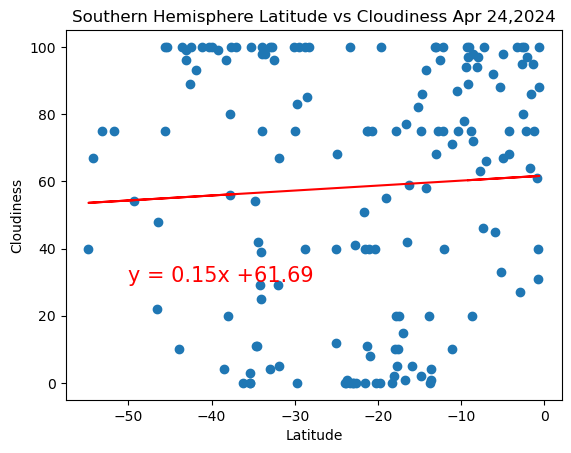

In [193]:
# Southern Hemisphere
# Build scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere Latitude vs Cloudiness Apr 24,2024")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(False)

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plot regression line
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

#print variance
print(f"the r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The very low variance and narly 0 slope of each regression line seems to indicate that there is a very minimal correlation between a city's latitude and its cloudiness. That is, the latutude of a city has little to no direct effect on that city's cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.009678518143878514


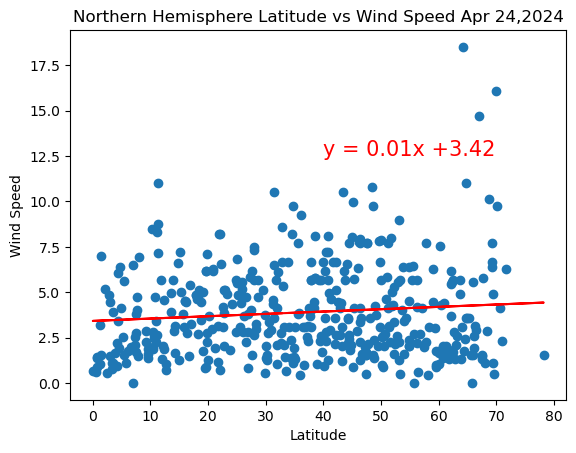

In [199]:
# Northern Hemisphere
# Build scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere Latitude vs Wind Speed Apr 24,2024")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(False)

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plot regression line
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,12.5),fontsize=15,color="red")

#print variance
print(f"the r-value is: {rvalue**2}")

# Show plot
plt.show()

the r-value is: 0.09058737918220003


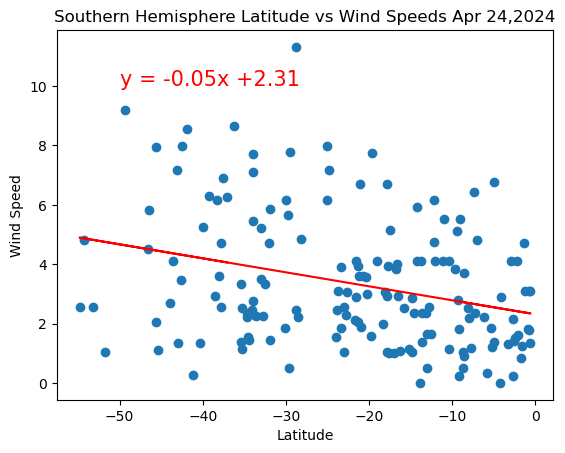

In [203]:
# Southern Hemisphere
# Build scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere Latitude vs Wind Speeds Apr 24,2024")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(False)

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plot regression line
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

#print variance
print(f"the r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The very low variance and narly 0 slope of each regression line seems to indicate that there is a very minimal correlation between a city's latitude and its wind speed. That is, the latutude of a city has little to no direct effect on that city's wind speed. 